In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')

In [4]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [5]:
df.shape

(183978, 42)

In [6]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [8]:
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [9]:
df.dropna(axis=0, inplace=True)

In [10]:
df.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [11]:
df[['date','preferred_foot','attacking_work_rate','defensive_work_rate']].head()

,date,preferred_foot,attacking_work_rate,defensive_work_rate
0,2016-02-18 00:00:00,right,medium,medium
1,2015-11-19 00:00:00,right,medium,medium
2,2015-09-21 00:00:00,right,medium,medium
3,2015-03-20 00:00:00,right,medium,medium
4,2007-02-22 00:00:00,right,medium,medium


In [12]:
df.preferred_foot.value_counts()

right    136247
left      44107
Name: preferred_foot, dtype: int64

In [13]:
df.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [14]:
df.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
o           1328
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

In [15]:
df.date.value_counts().head(10)

2007-02-22 00:00:00    10410
2011-08-30 00:00:00     6520
2015-09-21 00:00:00     6518
2013-09-20 00:00:00     6513
2012-08-31 00:00:00     6491
2014-09-18 00:00:00     6429
2013-02-15 00:00:00     6373
2010-08-30 00:00:00     6232
2012-02-22 00:00:00     6134
2011-02-22 00:00:00     5340
Name: date, dtype: int64

In [16]:
df = df.join(pd.get_dummies(df.preferred_foot, drop_first=True, prefix='ply'))

In [17]:
df = df.join(pd.get_dummies(df.attacking_work_rate, drop_first=True, prefix='ply'))

In [18]:
df = df.join(pd.get_dummies(df.defensive_work_rate, drop_first=True, prefix='plyd'))

In [19]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,plyd_8,plyd_9,plyd_ean,plyd_es,plyd_high,plyd_low,plyd_medium,plyd_o,plyd_ormal,plyd_tocky
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,0,0,0,0,0,0,1,0,0,0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,0,0,0,0,0,0,1,0,0,0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,0,0,0,0,0,0,1,0,0,0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,0,0,0,0,0,0,1,0,0,0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
X = df.drop(['id', 'overall_rating','date','preferred_foot','attacking_work_rate','defensive_work_rate'], axis = 1)
y = df['overall_rating']

In [21]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [22]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(126247, 61) (126247,) (54107, 61) (54107,)


In [23]:
lm = LinearRegression()
lm.fit(train_x, train_y)
lm.coef_, lm.intercept_

(array([-8.67700275e-06, -6.36560974e-06,  4.46323082e-01,  6.92523702e-03,
         1.46195984e-02,  5.52599843e-02,  5.62501995e-02, -7.20720881e-03,
         9.33139754e-03,  1.26545227e-02,  7.09800922e-03,  1.02624961e-02,
         1.12202445e-01,  1.16468861e-02,  1.48955017e-02, -1.02116102e-02,
         1.76349586e-01,  4.62235047e-03,  1.34193914e-02,  1.16064044e-02,
        -2.11384662e-03,  5.12045126e-02, -1.12100827e-02,  1.07405840e-02,
         3.74910384e-03, -6.47657862e-03, -1.81667444e-02,  9.50363880e-03,
         2.54755142e-02,  7.31330318e-03, -1.85146573e-02,  1.58000526e-01,
         2.54729570e-02, -4.66410587e-02,  4.81108227e-02,  1.92010321e-02,
        -4.18141123e-03,  2.51598886e-01, -9.69408665e-01,  1.13358422e+00,
         8.78359528e-02, -5.03736726e-01, -1.27452178e+00, -4.41658435e-01,
         7.52740400e-01, -3.73042250e-01, -5.36409604e-02, -7.84784934e-01,
        -4.49559612e-01, -1.54797828e-01,  2.33796390e-01,  1.61456924e-01,
         2.9

In [24]:
lm.score(train_x, train_y)

0.8610955865320222

In [25]:
lm.score(test_x, test_y)

0.8599639980991889

In [26]:
train_pred = lm.predict(train_x)
train_pred

array([63.2059719 , 67.62769856, 68.84906321, ..., 56.64718924,
       61.34897056, 65.52773542])

In [27]:
test_pred = lm.predict(test_x)
test_pred

array([74.26656354, 74.1964708 , 65.3576554 , ..., 66.59094599,
       77.47972293, 64.09919368])

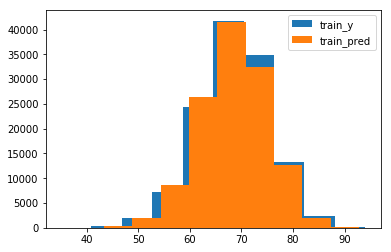

In [28]:
plt.hist(train_y, label='train_y')
plt.hist(lm.predict(train_x), label='train_pred')
plt.legend()

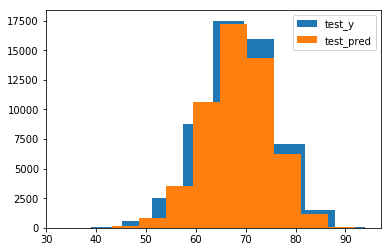

In [29]:
plt.hist(test_y, label='test_y')
plt.hist(lm.predict(test_x), label='test_pred')
plt.legend()

In [30]:
print('RMSE Train :',sqrt(mean_squared_error(train_y, train_pred)))
print('RMSE Test :',sqrt(mean_squared_error(test_y, test_pred)))

RMSE Train : 2.6146858335061616
RMSE Test : 2.6407214484721555


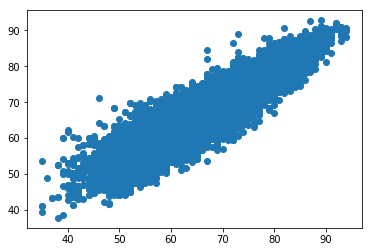

In [31]:
plt.scatter(train_y, train_pred)

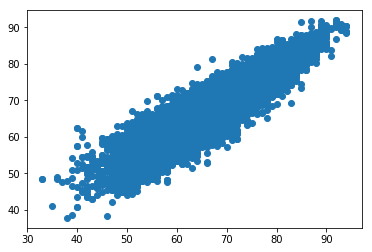

In [32]:
plt.scatter(test_y, test_pred)

(array([1.0000e+00, 2.0000e+00, 2.0000e+00, 8.0000e+00, 1.2000e+01,
        3.4000e+01, 1.0900e+02, 1.7800e+02, 6.2700e+02, 1.7740e+03,
        5.5940e+03, 1.6023e+04, 3.5347e+04, 3.8964e+04, 2.0205e+04,
        5.9320e+03, 1.1780e+03, 1.9800e+02, 4.4000e+01, 1.5000e+01]),
 array([-25.20210224, -23.26733493, -21.33256762, -19.39780031,
        -17.463033  , -15.52826569, -13.59349838, -11.65873107,
         -9.72396375,  -7.78919644,  -5.85442913,  -3.91966182,
         -1.98489451,  -0.0501272 ,   1.88464011,   3.81940742,
          5.75417474,   7.68894205,   9.62370936,  11.55847667,
         13.49324398]),
 <a list of 20 Patch objects>)

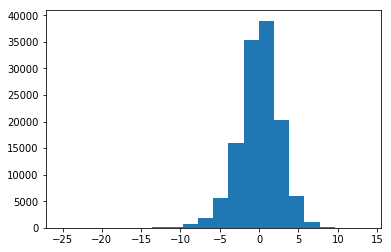

In [33]:
plt.hist(train_y - train_pred, bins = 20)

(array([3.0000e+00, 1.0000e+00, 2.0000e+00, 8.0000e+00, 1.4000e+01,
        5.2000e+01, 8.5000e+01, 2.9000e+02, 6.6300e+02, 1.7900e+03,
        4.9630e+03, 1.1884e+04, 1.6627e+04, 1.1633e+04, 4.5250e+03,
        1.2220e+03, 2.7800e+02, 3.3000e+01, 2.7000e+01, 7.0000e+00]),
 array([-22.31361794, -20.50908791, -18.70455788, -16.90002786,
        -15.09549783, -13.2909678 , -11.48643777,  -9.68190774,
         -7.87737771,  -6.07284769,  -4.26831766,  -2.46378763,
         -0.6592576 ,   1.14527243,   2.94980246,   4.75433248,
          6.55886251,   8.36339254,  10.16792257,  11.9724526 ,
         13.77698263]),
 <a list of 20 Patch objects>)

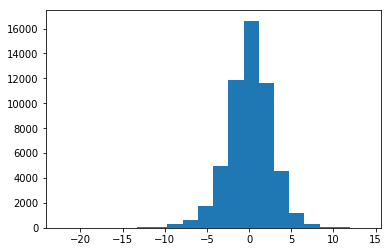

In [34]:
plt.hist(test_y - test_pred, bins=20)

- Using **OLS model**

In [35]:
import statsmodels.formula.api as smf

In [36]:
lms = smf.ols(formula='overall_rating ~ player_fifa_api_id+ player_api_id+ potential+ \
crossing+ finishing+ heading_accuracy+ short_passing+ volleys+ dribbling+ curve+ free_kick_accuracy+ \
long_passing+ ball_control+ acceleration+ sprint_speed+ agility+ reactions+ balance+ shot_power+ jumping+ \
stamina+ strength+ long_shots+ aggression+ interceptions+ positioning+ vision+ penalties+ marking+ \
standing_tackle+ sliding_tackle+ gk_diving+ gk_handling+ gk_kicking+ gk_positioning+ gk_reflexes+ \
ply_right+ ply_high+ ply_le+ ply_low+ ply_medium+ ply_norm+ ply_stoc+ ply_y+ plyd_1+ plyd_2+ plyd_3+ plyd_4+ \
plyd_5+ plyd_6+ plyd_7+ plyd_8+ plyd_9+ plyd_ean+ plyd_es+ plyd_high+ plyd_low+ plyd_medium+ plyd_o+ plyd_ormal+ \
plyd_tocky', data=df).fit()
lms.conf_int()
lms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 1.956e+04
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        01:53:38   Log-Likelihood:            -4.2978e+05
No. Observations:              180354   AIC:                         8.597e+05
Df Residuals:                  180296   BIC:                         8.603e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7025      0.214      3.276      0.001       0.282       1.123
player_fifa_api_id -8.729e-06   1.53e-07    -57.122      0.000   -9.03e-06   -8.43e-06
player_api_id      -6.342e-06   6.14e-08   -103.313      0.000   -6.46e-06   -6.22e-06
potential              0.4459      0.001    304.990      0.000       0.443       0.449
crossing               0.0067      0.001      8.368      0.000       0.005       0.008
finishing              0.0151      0.001     17.326      0.000       0.013       0.017
heading_accuracy       0.0560      0.001     72.182      0.000       0.054       0.058
short_passing          0.0565      0.001     43.374      0.000       0.054       0.059
volleys               -0.0068      0.001     -8.667      0.000      -0.008      -0.005
dribbling              0.0096      0.001      8.670      0.000       0.007       0.012
curve                  0.0116      0.001     15.403      0.000       0.010       0.013
free_kick_accuracy     0.0079      0.001     11.724      0.000       0.007       0.009
long_passing           0.0102      0.001     11.499      0.000       0.008       0.012
ball_control           0.1123      0.002     74.692      0.000       0.109       0.115
acceleration           0.0119      0.001      9.144      0.000       0.009       0.014
sprint_speed           0.0159      0.001     12.854      0.000       0.013       0.018
agility               -0.0117      0.001    -12.205      0.000      -0.014      -0.010
reactions              0.1760      0.001    168.048      0.000       0.174       0.178
balance                0.0048      0.001      6.499      0.000       0.003       0.006
shot_power             0.0133      0.001     16.030      0.000       0.012       0.015
jumping                0.0112      0.001     16.270      0.000       0.010       0.013
stamina               -0.0017      0.001     -2.124      0.034      -0.003      -0.000
strength               0.0503      0.001     63.238      0.000       0.049       0.052
long_shots            -0.0115      0.001    -13.277      0.000      -0.013      -0.010
aggression             0.0111      0.001     16.987      0.000       0.010       0.012
interceptions          0.0034      0.001      4.910      0.000       0.002       0.005
positioning           -0.0065      0.001     -8.698      0.000      -0.008      -0.005
vision                -0.0174      0.001    -20.850      0.000      -0.019      -0.016
penalties              0.0084      0.001     11.850      0.000       0.007       0.010
marking                0.0260      0.001     24.507      0.000       0.024       0.028
standing_tackle        0.0071      0.001      5.817      0.000       0.005       0.010
sliding_tackle        -0.0185      0.001    -17.721      0.000      -0.021      -0.016
gk_diving              0.1588      0.0

In [37]:
pred_y = lms.predict(test_x)

In [38]:
lms.conf_int()

,0,1
Intercept,0.282189,1.122777
player_fifa_api_id,-0.000009,-0.000008
player_api_id,-0.000006,-0.000006
potential,0.442995,0.448725
crossing,0.005156,0.008311
finishing,0.013366,0.016776
heading_accuracy,0.054497,0.057539
short_passing,0.053968,0.059077
volleys,-0.008298,-0.005237
dribbling,0.007440,0.011786


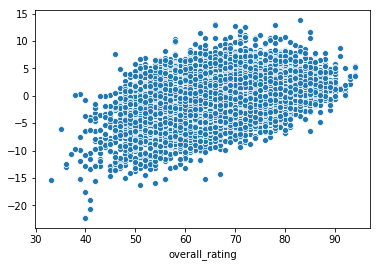

In [39]:
sns.scatterplot(test_y, (test_y - pred_y))

- Thus the R squared is **86 %**
- The p-value for most of the attrbutes are less then 0.05.
- The model is predicting at **85 %** rate.
- Also on the histogram, the predicted and actual values are plotted very similarly.